In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
plt.rcParams['figure.figsize'] = [8, 8]
from tqdm import tqdm

Cloudy days = 16.629%
Sunny days = 83.371%


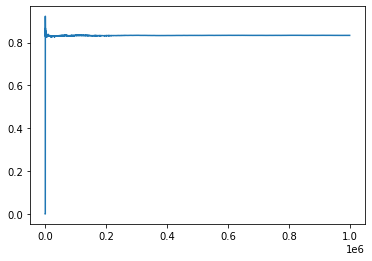

In [2]:
w = []

p_1_0 = 0.5 #0 is cloudy, 1 is sunny
p_0_1 = 0.1
p_0_0 = 0.5
p_1_1 = 0.9

trace = []
trace_n = 0
to_trace = 1

N = 1000000 # number of days

init_w = 0

if init_w == to_trace:
    trace_n = 1
    trace.append(trace_n)

else:
    trace.append(trace_n)
        
w_current = init_w

w.append(w_current)

for i in range(1, N):
    
    p = uniform.rvs()

    if w_current == 0:

        if p > 0.5:
            w_current = 1
        else:
            w_current = 0

    elif w_current == 1:

        if p <= 0.9:
            w_current = 1
        else:
            w_current = 0

    w.append(w_current)
    
    if w_current == to_trace:
        
        trace_n += 1
        trace.append(trace_n/i)
        
    else:
        
        trace.append(trace_n/i)
        
unique, counts = np.unique(w, return_counts=True)
print('Cloudy days = ' + str(counts[0]*100/N) + '%')
print('Sunny days = ' + str(counts[1]*100/N) + '%')

plt.plot(range(N), trace)

#print(trace)

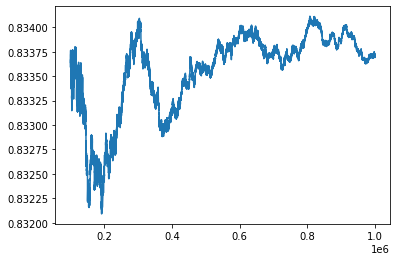

In [3]:
burn_in = 600000
plt.plot(range(burn_in, N), trace[burn_in:])

0.833693477512744
0.0003369590269586885
0.8320913023086143 0.8341121987028951


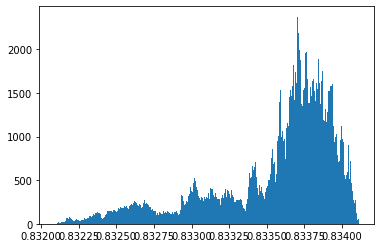

In [5]:
plt.hist(trace[burn_in:], bins = int(np.sqrt(len(trace[burn_in:]))), density = True)

print(np.median(trace[burn_in:]))
print(astroMLstats.sigmaG(trace[burn_in:]))
print(min(trace[burn_in:]),max(trace[burn_in:]))

plt.show()

# Stock Market

Bull market = 46.3781%
Bear market = 37.4604%
Stagnant market = 16.1615%


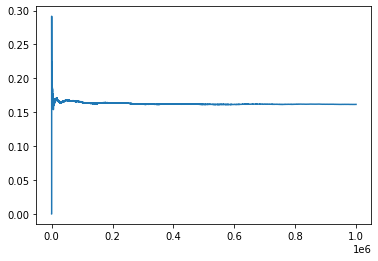

In [6]:
m = []

p_0_0 = 0.9 #0 is bull, 1 is bear, 2 is stag
p_1_0 = 0.075
p_2_0 = 0.025
p_0_1 = 0.15
p_1_1 = 0.8
p_2_1 = 0.05
p_0_2 = 0.25
p_1_2 = 0.25
p_2_2 = 0.5

trace = []
trace_n = 0
to_trace = 2

N = 1000000 # number of days

init_m = 0 

if init_m == to_trace:
    trace_n = 1
    trace.append(trace_n)

else:
    trace.append(trace_n)
        
m_current = init_m

m.append(m_current)

for i in range(1, N):
    
    p = uniform.rvs()

    if m_current == 0:

        if p < 0.9:
            m_current = 0
        elif p >= 0.9 and p < 0.975:
            m_current = 1
        else:
            m_current = 2

    elif m_current == 1:

        if p < 0.8:
            m_current = 1
        elif p >= 0.8 and p < 0.815:
            m_current = 0
        else:
            m_current = 2
            
    elif m_current == 2:

        if p < 0.5:
            m_current = 2
        elif p >= 0.5 and p < 0.75:
            m_current = 0
        else:
            m_current = 1

    m.append(m_current)
    
    if m_current == to_trace:
        
        trace_n += 1
        trace.append(trace_n/i)
        
    else:
        
        trace.append(trace_n/i)
        
unique, counts = np.unique(m, return_counts=True)
print('Bull market = ' + str(counts[0]*100/N) + '%')
print('Bear market = ' + str(counts[1]*100/N) + '%')
print('Stagnant market = ' + str(counts[2]*100/N) + '%')

plt.plot(range(N), trace)

#print(trace)

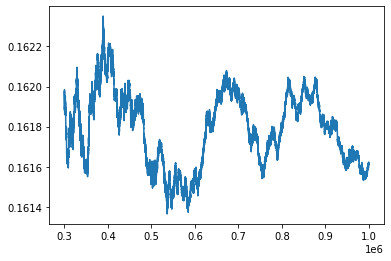

In [10]:
burn_in = 300000
plt.plot(range(burn_in, N), trace[burn_in:])

0.1618022512933281
0.00022262641247772487
0.16136492820336013 0.16235022353927758


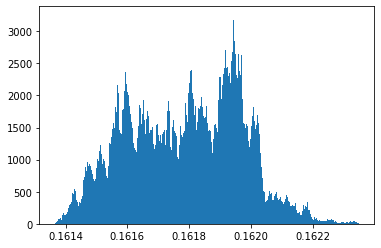

In [11]:
plt.hist(trace[burn_in:], bins = int(np.sqrt(len(trace[burn_in:]))), density = True)

print(np.median(trace[burn_in:]))
print(astroMLstats.sigmaG(trace[burn_in:]))
print(min(trace[burn_in:]),max(trace[burn_in:]))

plt.show()